In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from modules import solver, presolver
from pyballistics import ozvb_lagrange, get_db_powder, get_powder_names
from joblib import Parallel, delayed
import matplotlib as mpl

### Прямая задача

In [9]:
d = 125*1e-3
name = "15/1 тр В/А"
wq_0, ro_0 = 1.517220, 844.921773
bounds = [1.3, 450]
init_dict  = presolver.init_dict(name)
core = joblib.cpu_count()-2

In [10]:
%%time
tabel = presolver.random_points_multiproc(init_dict, [2.5, 700], bounds, max_loop=10000, core=core)

Wall time: 7min 5s


In [4]:
%%time
#tabel = presolver.random_points(init_dict, [2.5, 700], bounds, max_loop=100)

Wall time: 20.6 s


In [11]:
tabel = pd.DataFrame(tabel)

In [ ]:
table.to_csv("data/direct_task.csv", index=False)

In [59]:
tabel.head()

,wq,ro,reason,mass
0,2.701764,692.692213,destroy,NaN
1,1.779855,810.942660,x_p,1011.556783
2,1.580569,610.808562,v_p,NaN
3,2.473149,643.980635,x_p,1348.655711
4,2.008315,578.565936,v_p,NaN


<ipython-input-58-08ac28713e32>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = tabel[tabel['reason']=='x_p'][tabel['mass'] < 1000]['wq']
<ipython-input-58-08ac28713e32>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = tabel[tabel['reason']=='x_p'][tabel['mass'] < 1000]['ro']
<ipython-input-58-08ac28713e32>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  col = tabel[tabel['reason']=='x_p'][tabel['mass'] < 1000]['mass']


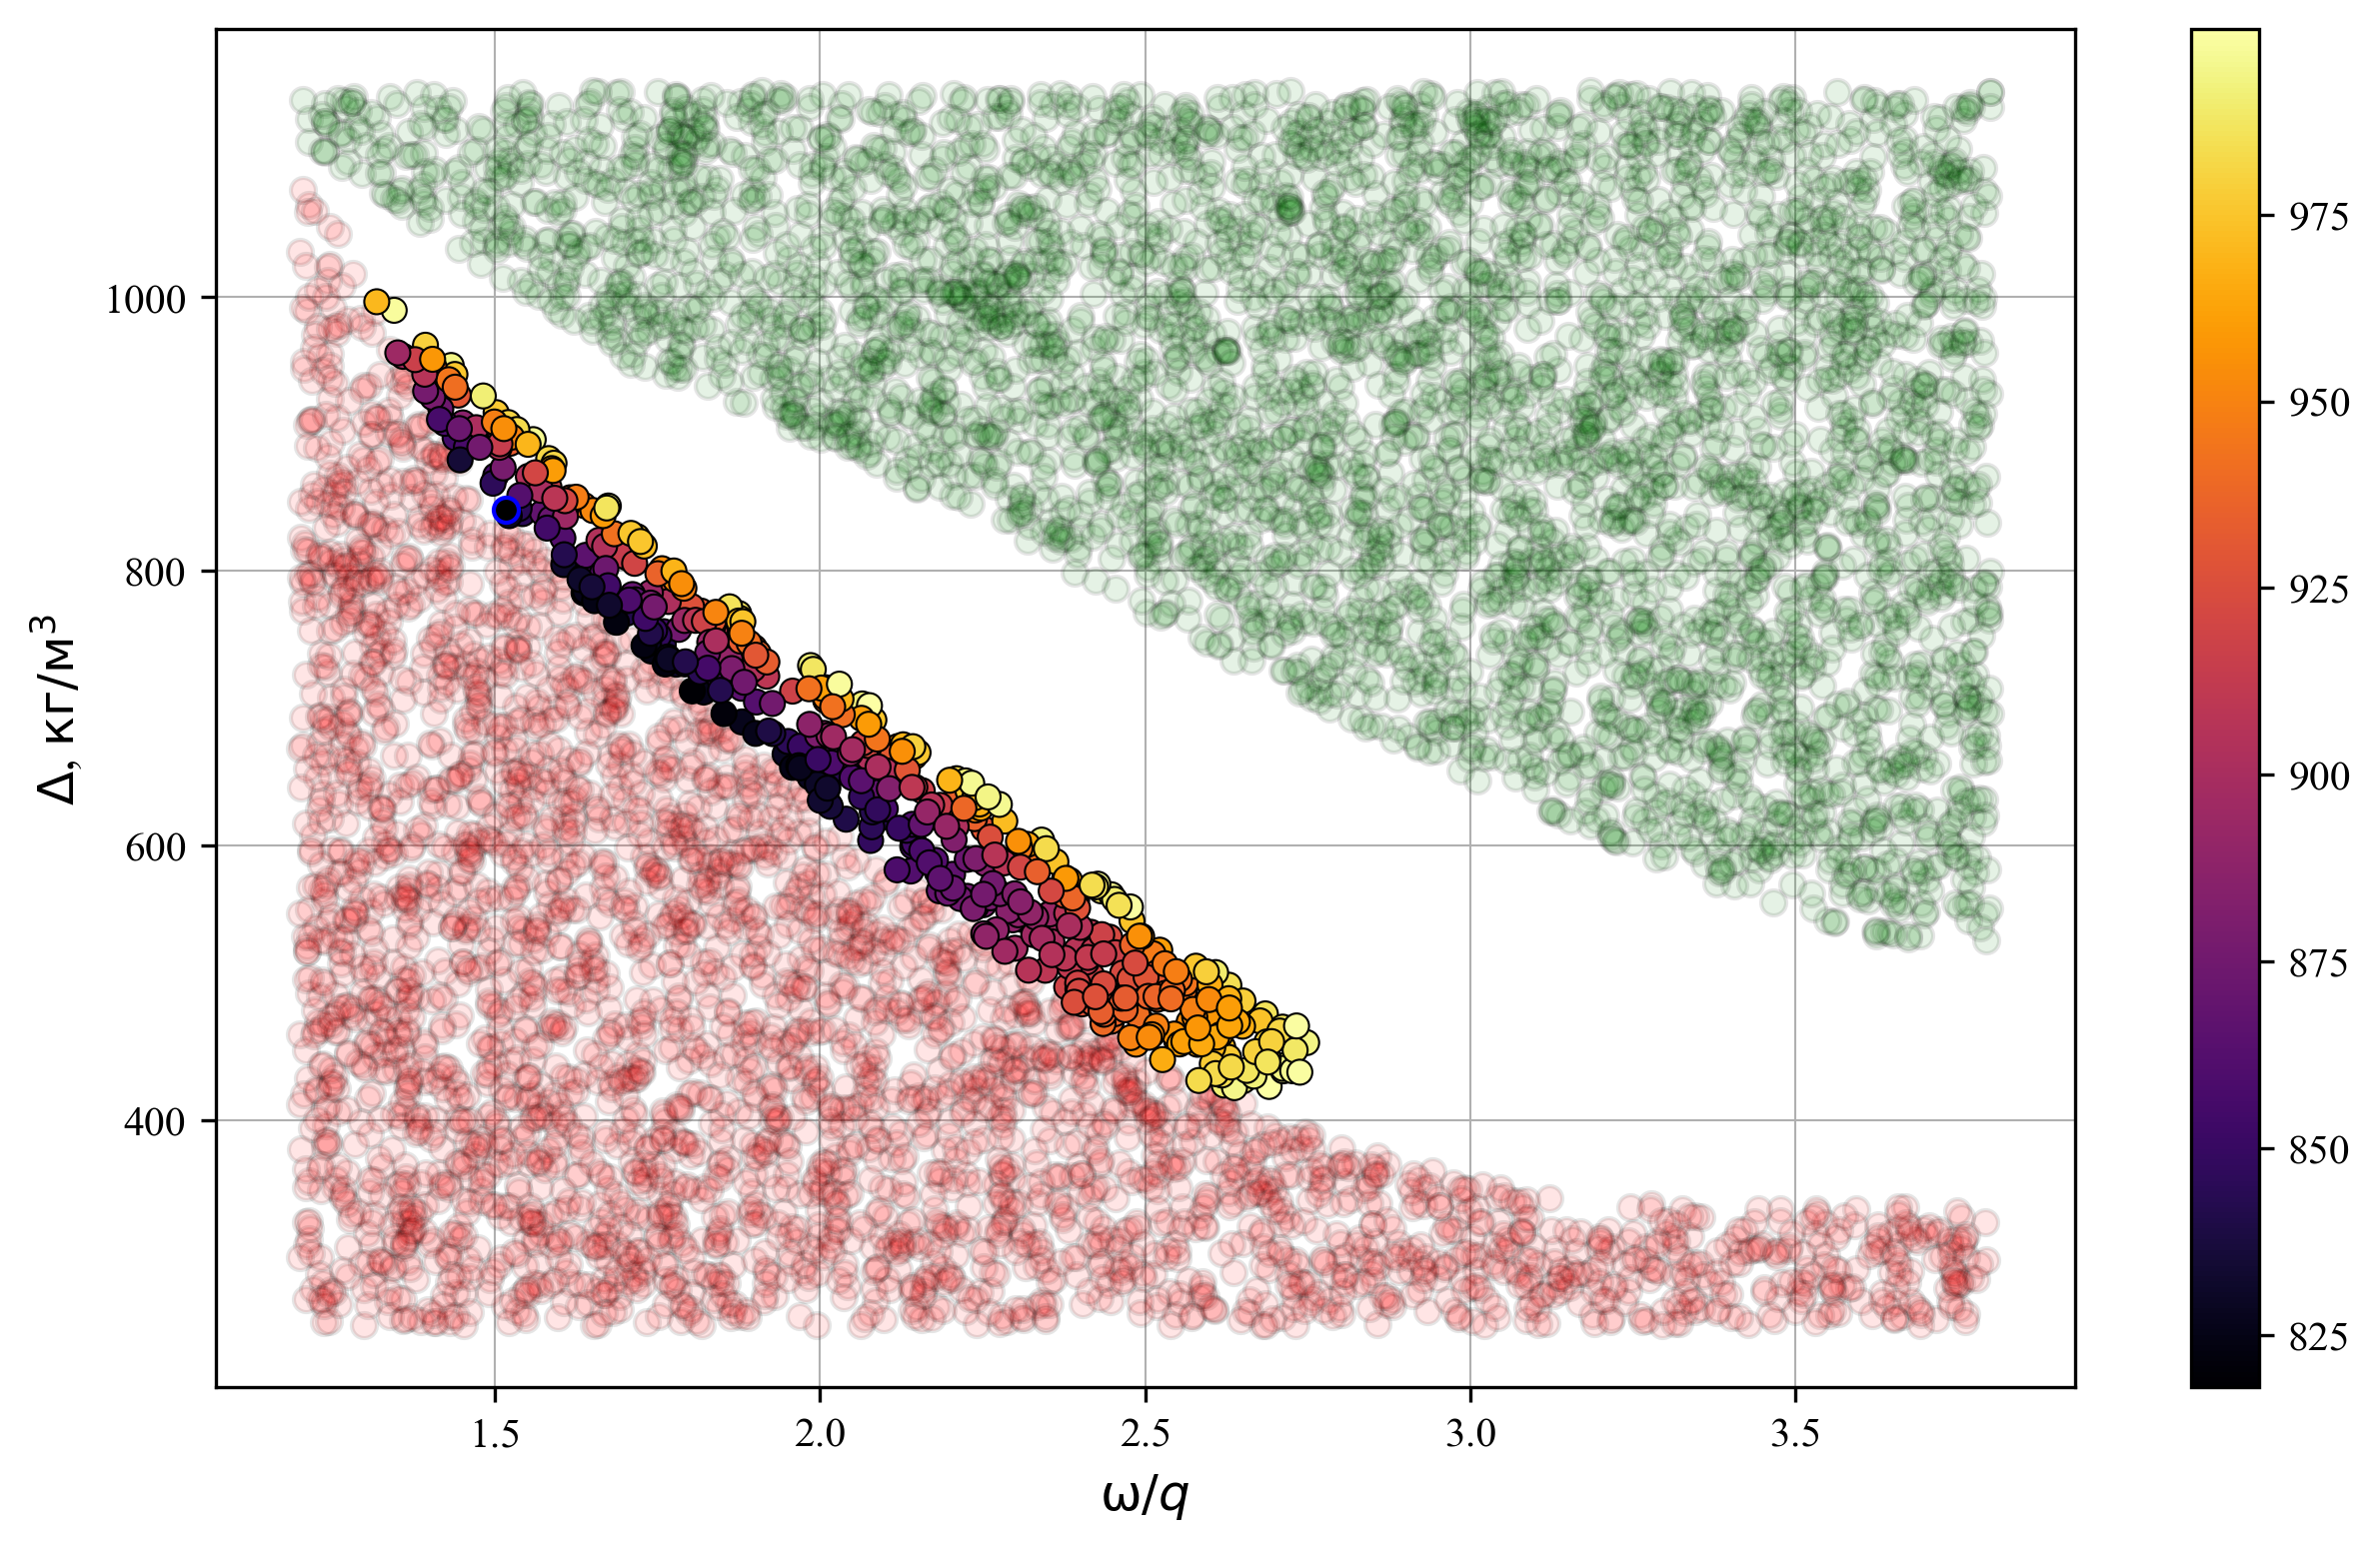

In [58]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"

fig = plt.figure(figsize=(10,6), dpi=300)

norm = mpl.colors.Normalize(vmin=500, vmax=4000)

treshold = 1000

x = tabel[tabel['reason']=='x_p'][tabel['mass'] < treshold]['wq']
y = tabel[tabel['reason']=='x_p'][tabel['mass'] < treshold]['ro']
col = tabel[tabel['reason']=='x_p'][tabel['mass'] < treshold]['mass']

x1 = tabel[tabel['reason']=='x_p'][tabel['mass'] >= treshold]['wq']
y1 = tabel[tabel['reason']=='x_p'][tabel['mass'] >= treshold]['ro']

plt.scatter(tabel[tabel['reason']=='v_p']['wq'], tabel[tabel['reason']=='v_p']['ro'],\
            color='red', edgecolors='black', linewidths=1, zorder = 3, alpha=0.1)
plt.scatter(tabel[tabel['reason']=='p_max']['wq'], tabel[tabel['reason']=='p_max']['ro'],\
            color='green', edgecolors='black', linewidths=1, zorder = 3, alpha=0.1)
fig3 = plt.scatter(x, y, c=col, cmap='inferno', edgecolors='black', linewidths=0.5, zorder = 3)
plt.scatter(x1, y1, c='yellow', edgecolors='black', linewidths=0.5, zorder = 3)

plt.scatter(wq_0, ro_0, color='black', edgecolors='blue', linewidths=1, zorder = 3)

#plt.legend(fontsize=16, loc=(1.04,0.15) )
plt.colorbar(fig3)
plt.xlabel(r'$\mathrm{\omega/\mathit{q}}$',  fontsize = 12)
plt.ylabel('$\mathit{\Delta}$, $\mathrm{кг/м^3}$',  fontsize = 12)
plt.grid(linewidth=0.5)
plt.show()

### Геометрия